In [ ]:
# Import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [ ]:
# Loading the Fashion MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
# Split the data into training and validation sets
# Since Fashion MINST Dataset has already divided train and test sets we just
#     need to declare the variables to extract the data.
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Checking shape of the x_train, y_train, x_test, y_test
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


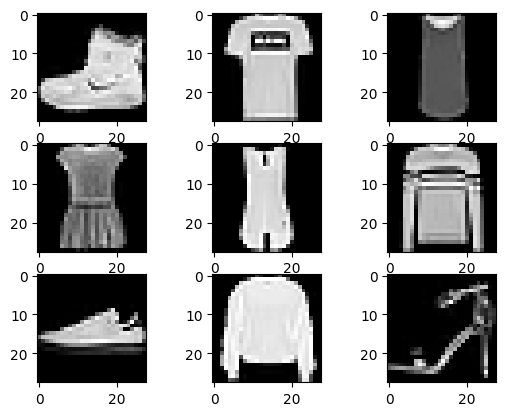

In [ ]:

# Visualizing the data
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
# Splitting the data for Pretraining and Transfer Learning

# Declaring list
pt_x_train = []
pt_y_train = []
pt_x_test = []
pt_y_test = []

tl_x_train = []
tl_y_train = []
tl_x_test = []
tl_y_test = []

# Splitting the data to,
# - Pretraining
#    - pt_x_train
#    - pt_y_train
#    - pt_x_test
#    - pt_x_test
# - Transfer Learning
#    - tl_x_train
#    - tl_y_train
#    - tl_x_test
#    - tl_y_test
# We first train on the
for i in range(len(x_train)):
    if y_train[i] < 5:
        pt_x_train.append(x_train[i] / 255) # Normalize
        pt_y_train.append(y_train[i])
    else:
        tl_x_train.append(x_train[i] / 255)
        tl_y_train.append(y_train[i])

for i in range(len(x_test)):
    if y_test[i] < 5:
        pt_x_test.append(x_test[i] / 255)
        pt_y_test.append(y_test[i])
    else:
        tl_x_test.append(x_test[i] / 255)
        tl_y_test.append(y_test[i])

In [ ]:
# Reshaping data

# Converting grayscale to 3 channel image
pt_x_train = np.asarray(pt_x_train).reshape(-1, 28, 28, 1)
pt_x_test = np.asarray(pt_x_test).reshape(-1, 28, 28, 1)
pt_y_train = to_categorical(np.asarray(pt_y_train))
pt_y_test = to_categorical(np.asarray(pt_y_test))

tl_x_train = np.asarray(tl_x_train).reshape(-1, 28, 28, 1)
tl_x_test = np.asarray(tl_x_test).reshape(-1, 28, 28, 1)
tl_y_train = to_categorical(np.asarray(tl_y_train))
tl_y_test = to_categorical(np.asarray(tl_y_test))

print("Pre Training [Train and Test data]")
print(pt_x_train.shape, pt_y_train.shape)
print(pt_x_test.shape, pt_y_test.shape)

print("\nTransfer Learning [Train and Test data]")
print(tl_x_train.shape, tl_y_train.shape)
print(tl_x_test.shape, tl_y_test.shape)

Pre Training [Train and Test data]
(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)

Transfer Learning [Train and Test data]
(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


In [ ]:
# Pre-Train Model


# Model chosing
# - 3 Conv2D
# - 1 Maxpool2d
# - 1 Flatten
# - 1 Dropout
# - 3 Dense
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, 5, input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(16, 5, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(8, 3, activation = 'relu'))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [ ]:
# Pre-Training
start_pt = datetime.datetime.now()

model.fit(pt_x_train, pt_y_train,
         validation_data = (pt_x_test, pt_y_test),
         epochs = 20,
         shuffle = True,
         batch_size = 32,
         verbose = 1)

end_pt = datetime.datetime.now()

Epoch 1/20
938/938 [==============================] - 12s 7ms/step - loss: 0.4462 - accuracy: 0.8265 - val_loss: 0.3010 - val_accuracy: 0.8832
Epoch 2/20
938/938 [==============================] - 6s 7ms/step - loss: 0.2854 - accuracy: 0.8955 - val_loss: 0.2543 - val_accuracy: 0.9078
Epoch 3/20
938/938 [==============================] - 7s 7ms/step - loss: 0.2541 - accuracy: 0.9080 - val_loss: 0.2404 - val_accuracy: 0.9104
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2268 - accuracy: 0.9176 - val_loss: 0.2009 - val_accuracy: 0.9328
Epoch 5/20
938/938 [==============================] - 7s 7ms/step - loss: 0.2108 - accuracy: 0.9235 - val_loss: 0.1936 - val_accuracy: 0.9324
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2003 - accuracy: 0.9275 - val_loss: 0.1983 - val_accuracy: 0.9284
Epoch 7/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1936 - accuracy: 0.9279 - val_loss: 0.1991 - val_accuracy: 0.9272
Epoch

In [ ]:
# Making convolutioal layers untrainable
print("Layers of the Model:", model.layers)

# Making the first six layers untrainable
for layer in model.layers[:6]:
    layer.trainable = False

for layer in model.layers:
    print(layer.trainable)


Layers of the Model: [<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c5d6fba2b30>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c5d75772ec0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c5d757728f0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c5dfda1d840>, <keras.src.layers.reshaping.flatten.Flatten object at 0x7c5d6fbca9e0>, <keras.src.layers.regularization.dropout.Dropout object at 0x7c5dfe857010>, <keras.src.layers.core.dense.Dense object at 0x7c5d6fbcb5b0>, <keras.src.layers.core.dense.Dense object at 0x7c5d6fbcb550>, <keras.src.layers.core.dense.Dense object at 0x7c5d6fbcbc10>]
False
False
False
False
False
False
True
True
True


In [ ]:
# Transfer learning model

# Model chosing
# - 3 Dense
# - 1 Droput
tl_model = Sequential(model.layers[:6])

tl_model.add(Dense(128, activation = 'relu'))
tl_model.add(Dense(64, activation = 'relu'))
tl_model.add(Dropout(0.2))
tl_model.add(Dense(10, activation = 'softmax'))

tl_model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam', metrics = ['accuracy'])

tl_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                      

In [ ]:
# Transfer Learning Training
start_tl = datetime.datetime.now()

history = tl_model.fit(tl_x_train, tl_y_train,
            validation_data = (tl_x_test, tl_y_test),
            epochs = 20,
            shuffle = True,
            batch_size = 32,
            verbose = 1)

end_tl = datetime.datetime.now()


Epoch 1/20
938/938 [==============================] - 7s 6ms/step - loss: 0.2708 - accuracy: 0.9070 - val_loss: 0.1477 - val_accuracy: 0.9478
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1702 - accuracy: 0.9407 - val_loss: 0.1299 - val_accuracy: 0.9544
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.1532 - accuracy: 0.9466 - val_loss: 0.1069 - val_accuracy: 0.9610
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1376 - accuracy: 0.9523 - val_loss: 0.1034 - val_accuracy: 0.9640
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1304 - accuracy: 0.9536 - val_loss: 0.0979 - val_accuracy: 0.9644
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1185 - accuracy: 0.9587 - val_loss: 0.0967 - val_accuracy: 0.9670
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 0.1137 - accuracy: 0.9596 - val_loss: 0.0900 - val_accuracy: 0.9664
Epoch 

In [ ]:
# Test Accuracy
test_loss, test_accuracy = tl_model.evaluate(tl_x_test, tl_y_test)
print("Test Accuracy: ", test_accuracy*100)


157/157 [==============================] - 1s 5ms/step - loss: 0.0972 - accuracy: 0.9672
Test Accuracy:  96.7199981212616


<ipython-input-16-93bdc13291a6>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


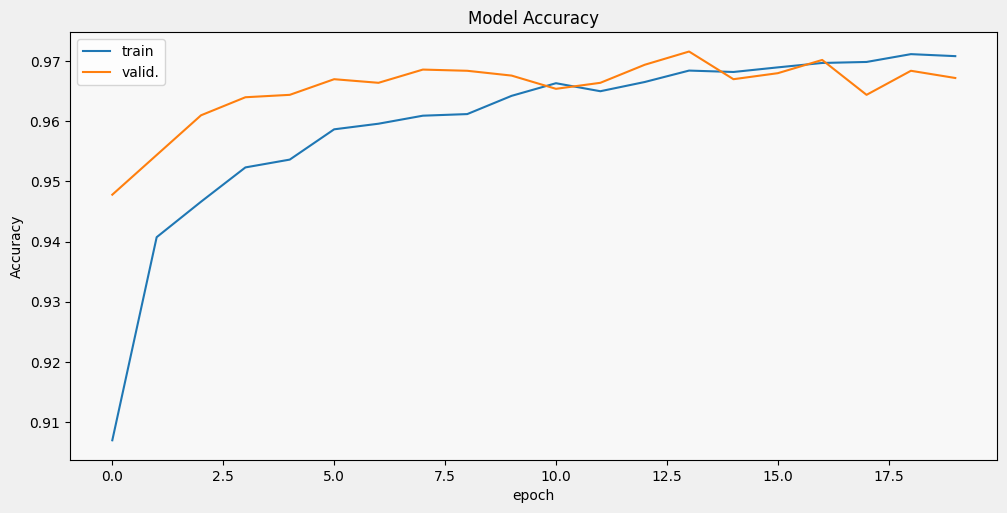

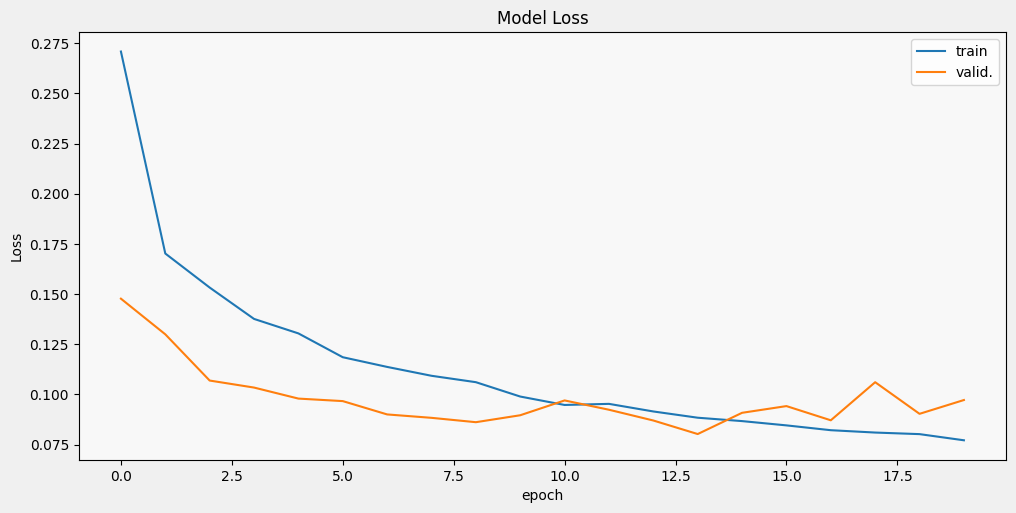

In [ ]:
# Training curves graph
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('Model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Accuracy graph
display_training_curves(history.history['accuracy'],
                        history.history['val_accuracy'], 'Accuracy', 211)
# M
display_training_curves(history.history['loss'], history.history['val_loss'],
                        'Loss', 211)


In [ ]:
# Since both training and validation accuracy are high and the losses
#     are low, it indicates a good balance.

In [ ]:
import seaborn as sns

157/157 [==============================] - 1s 5ms/step
Confusion Matrix for Model:
[[951   3  24  17   5]
 [  3 980   2  13   2]
 [ 23   0 904   8  65]
 [ 15   3  11 934  37]
 [  2   1  34  21 942]]


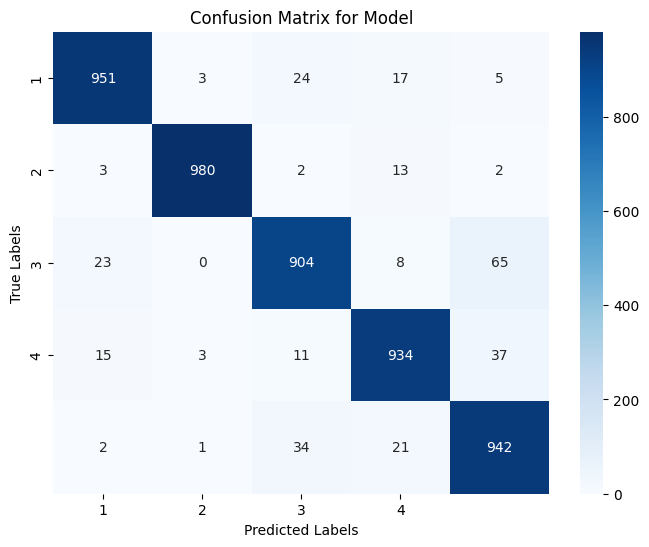

In [ ]:
# Predictions for model
model_predictions = model.predict(pt_x_test)
model_pred_labels = np.argmax(model_predictions, axis=1)

# True labels for model
model_true_labels = np.argmax(pt_y_test, axis=1)

# Confusion matrix for model
model_confusion_mtx = confusion_matrix(model_true_labels, model_pred_labels)

# Display confusion matrix for model
print("Confusion Matrix for Model:")
print(model_confusion_mtx)

plt.figure(figsize=(8, 6))
sns.heatmap(model_confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=range(1,5), yticklabels=range(1,5))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model')
plt.show()


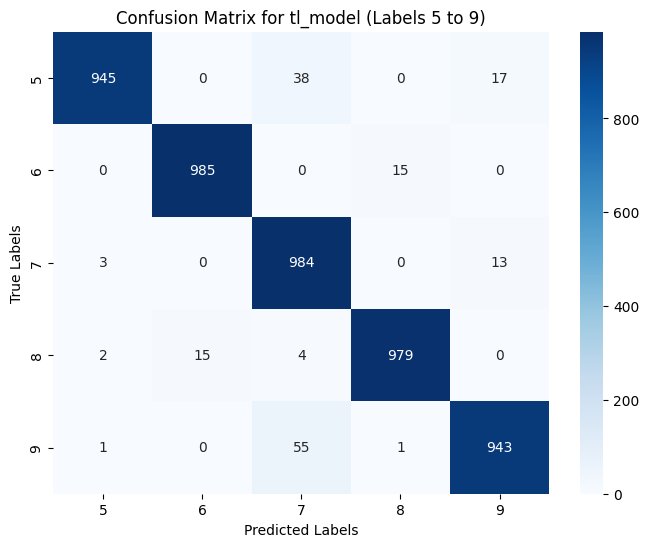

In [ ]:
# Predictions for tl_model
# Assuming tl_y_test contains labels for all 10 classes
# Filter the labels for 5 to 9
filtered_labels = np.isin(np.argmax(tl_y_test, axis=1), list(range(10)))
tl_y_test_filtered = tl_y_test[filtered_labels]

# Now, when you create the confusion matrix, it should include labels 5 to 9
tl_model_confusion_mtx = confusion_matrix(np.argmax(tl_y_test_filtered, axis=1), tl_model_pred_labels)

# Plot confusion matrix for tl_model with selected labels
plt.figure(figsize=(8, 6))
sns.heatmap(tl_model_confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=range(5, 10), yticklabels=range(5, 10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for tl_model (Labels 5 to 9)')
plt.show()


In [ ]:
print('Time taken for training the models:')
print('\n Pre-train model: ', end_pt - start_pt)
print('\n Transfer learning model: ', end_tl - start_tl)

Time taken for training the models:

 Pre-train model:  0:02:23.553123

 Transfer learning model:  0:01:40.399706


In [ ]:
# Function creation
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, confusion_matrix
tl_model = Sequential(model.layers[:6])

tl_model.add(Dense(128, activation = 'relu'))
tl_model.add(Dense(64, activation = 'relu'))
tl_model.add(Dropout(0.2))
tl_model.add(Dense(10, activation = 'softmax'))

tl_model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam', metrics = ['accuracy'])

tl_model.summary()

def comprehensive_fashion_mnist_model(random_seed=69):
    # Set random seed for reproducibility
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)

    # Loading the Fashion MNIST Dataset
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Data Preprocessing
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    # Model Creation
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    # Model Compilation
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Model Training
    model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

    # Model Evaluation
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

    # Making Predictions
    predictions = model.predict(x_test)
    y_pred_classes = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate Precision, Recall, and Confusion Matrix
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    confusion_mtx = confusion_matrix(y_true, y_pred_classes)  # Changed variable name here

    # Fit Analysis
    fit_analysis = "Good Fit"
    if test_accuracy > 0.95:
        fit_analysis = "Overfitting"
    elif test_accuracy < 0.85:
        fit_analysis = "Underfitting"

    return model, test_accuracy, precision, recall, confusion_mtx, fit_analysis

# Example usage:

# Call the function
model, accuracy, precision, recall, confusion_matrix_result, fit_analysis = comprehensive_fashion_mnist_model(random_seed=42)

# Print the results or use them as needed
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Fit Analysis:", fit_analysis)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                      

In [ ]:
# In order to enhance the model, we can increase the gpu memory and upscale the
#     images. The upscaled images can be passed through Deep learning
#     architecture. This might increase the accuracy. Also image augumentation
#     can improve the accuracy making it a more non-linear model